In [ ]:
## This script is used  to generate plots in the paper "Hierarchical learning of PDEs"

In [ ]:
## clear ram
# import torch
# with torch.no_grad():
#     torch.cuda.empty_cache()
# %reset

In [71]:
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle
import numpy as np
import torch
import string
import warnings
warnings.filterwarnings('ignore')
criterion = torch.nn.MSELoss(reduction='none')

In [72]:
# paths
noise = 0.0 
system = 'KS'  
data_dir = os.path.join('../data/', system)
pickle_file_path=os.path.join('../aehitsResults/KS/data')
path_fig=os.path.join('../aehitsResults/KS/figure/')

In [73]:
# test_dataALL = torch.load(data_dir + "/test_data.pt")
# T10=test_dataALL.shape[1]
# T1=int(T10/10)
# t_test=T10 #(T1+1),(T10)
# test_data=test_dataALL[:,:t_test,:]
# test_data.shape

## FHN model PLOTTING

### FHN PLOTTING

#### Loading the result data

In [6]:
## for first plot

In [74]:
with open(pickle_file_path+"/KSresults.pickle", 'rb') as file:
    FHNresults= pickle.load(file)
test_data=FHNresults['test_data']
encoded=FHNresults['encoded'].cpu().detach().numpy()
AEpred=FHNresults['AEpred']
preds_mse=FHNresults['NNTS_error']
z_hits=FHNresults['z_hits'].cpu().detach().numpy()
multiscale_err=FHNresults['multiscale_err']
y_hits=FHNresults['y_hits'].cpu().detach().numpy()

In [75]:
mse_latent=loadmat(pickle_file_path+"/KSmse_latent.mat") # mse_latent for FHN
AE_loss=mse_latent['AE_loss']
AE_loss=AE_loss.reshape(AE_loss.shape[1])
PCA_loss=mse_latent['PCA_loss']
PCA_loss=PCA_loss.reshape(PCA_loss.shape[1])

In [76]:
# for third plot

In [77]:
# with open(pickle_file_path+"/FHNresults_1T.pickle", 'rb') as file:
#     FHNresults_1T = pickle.load(file)
# with open(pickle_file_path+"/KSresults_KS_1T.pickle", 'rb') as file:
#     FHNresults_1T = pickle.load(file)


In [78]:
## error
latent_hits=criterion(torch.tensor(z_hits).float(), torch.tensor(encoded[:,1:,:]).float())#.mean(1)#.mean(-1)

In [79]:
### 5TH PLOT

In [80]:
AE_loss.shape,PCA_loss.shape

((10,), (10,))

#### Plotting the results

In [52]:
### First Plot

In [53]:
### Second plot

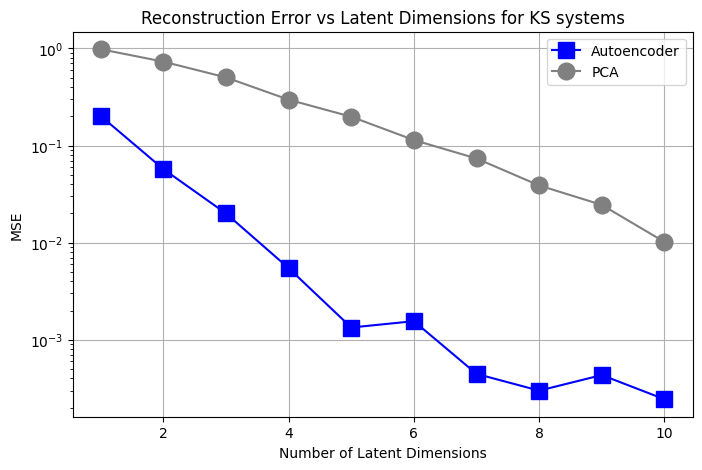

AE:  [0.20127594470977783, 0.057176291942596436, 0.019979702308773994, 0.005468179006129503, 0.0013390613021329045, 0.0015558983432129025, 0.00044592280755750835, 0.00029978761449456215, 0.00043372175423428416, 0.0002446057624183595]
PCA:  [0.98074174 0.73042864 0.5027473  0.29643142 0.19793345 0.11385487
 0.07356788 0.0388291  0.02449158 0.01018343]


In [16]:
latent_dims= np.arange(1,11,1)
plt.figure(figsize=(8, 5))
plt.semilogy(latent_dims, AE_loss, marker='s',markersize=12,label='Autoencoder',color='blue')
plt.semilogy(latent_dims, PCA_loss, marker='o',markersize=12,label='PCA',color='gray')
plt.title('Reconstruction Error vs Latent Dimensions for {} systems'.format(system))
plt.xlabel('Number of Latent Dimensions')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()


print('AE: ',[item.item() for item in AE_loss])
print('PCA: ',PCA_loss)


In [17]:
#### 3rd plot

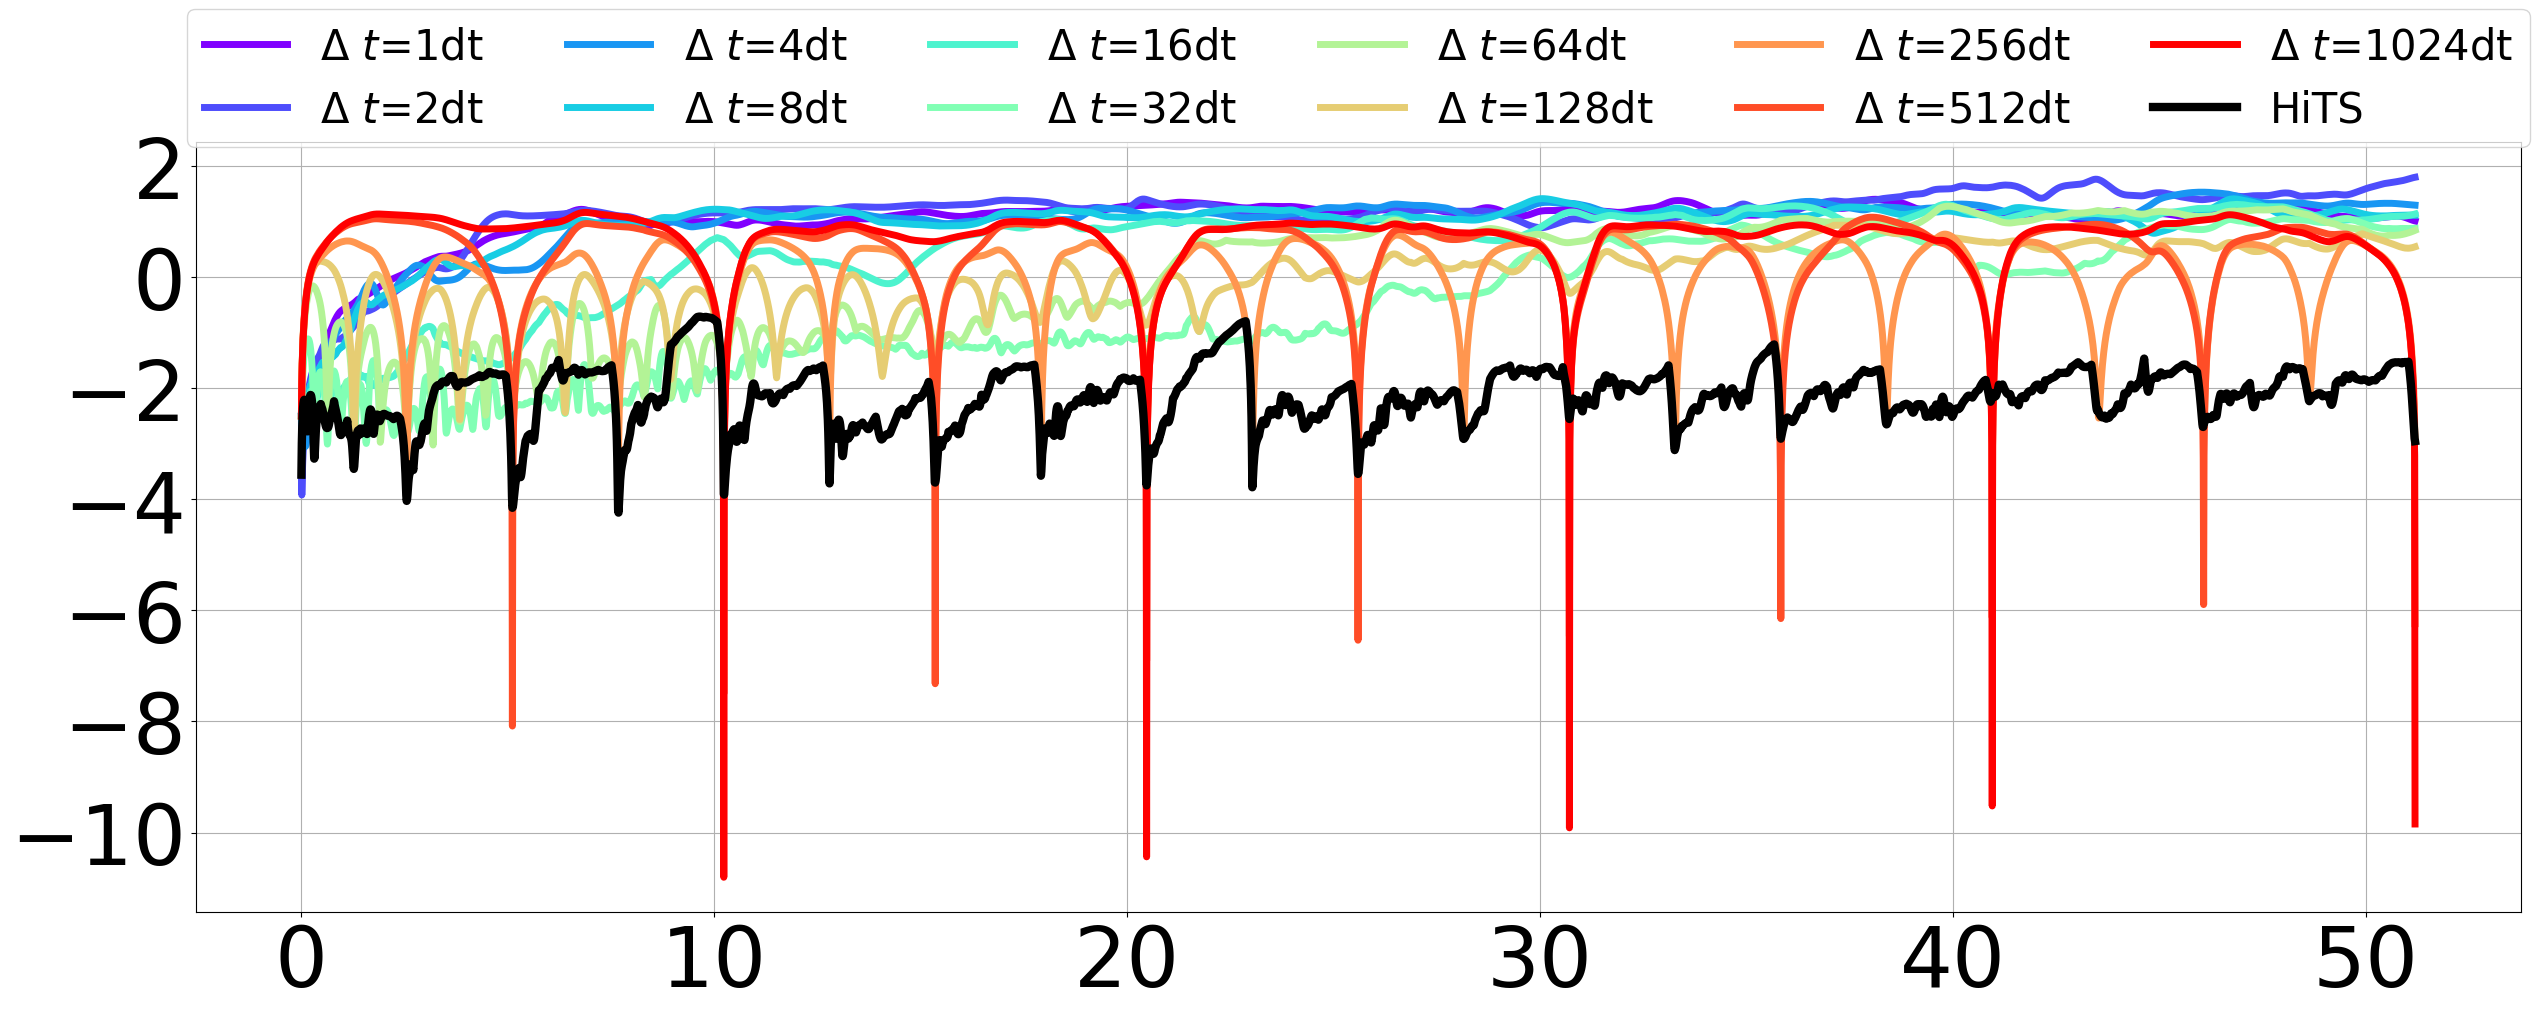

In [18]:
step_sizes=[1,2,4,8,16,32,64,128,256,512,1024]
dt=0.01
n_steps=5120
t = np.linspace(0, (n_steps-1)*dt, n_steps)
ks = list(range(11))
fig = plt.figure(figsize=(30, 10))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, len(ks))))
for k in range(11):
    err = preds_mse[k]
    mean = err.mean(0).cpu().detach().numpy()
    rgb = next(colors)
    plt.plot(t, np.log10(mean), linestyle='-', color=rgb, linewidth=5, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
plt.plot(t, np.log10(multiscale_err), linestyle='-', color='k', linewidth=6, label='HiTS')
plt.legend(fontsize=30, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.2))
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid()
plt.show()

In [19]:
# plt.semilogy(latent_hits[0,:,0])
# plt.semilogy(latent_lstm[0,:,0],'r--')
# plt.semilogy(latent_RC[0,:,0],'b--')
# plt.semilogy(latent_sindy[0,1:,0],'g--')
# l=['hits','lstm','rc','sindy']
# plt.legend(l,loc='lower right')
# plt.show()

In [20]:
encoded.shape,z_hits.shape

((5, 5121, 8), (5, 5120, 8))

In [21]:
# d=1
# plt.plot(encoded[0,1:,0],encoded[0,1:,d],'k',lw=2)
# plt.plot(z_hits[0,:,0],z_hits[0,:,d],'r--',lw=2)
# plt.show()

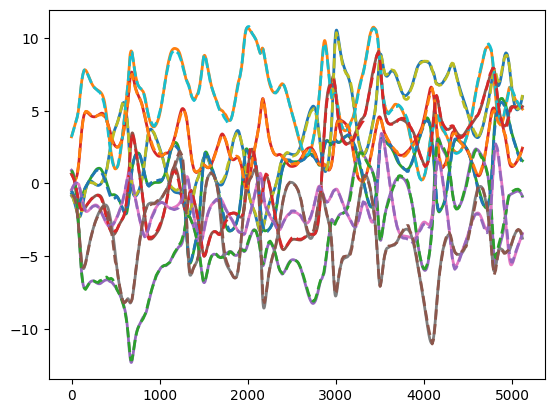

In [41]:
plt.plot(encoded[0,1:,:],lw=2)
plt.plot(z_hits[0,:,:],'--',lw=2)

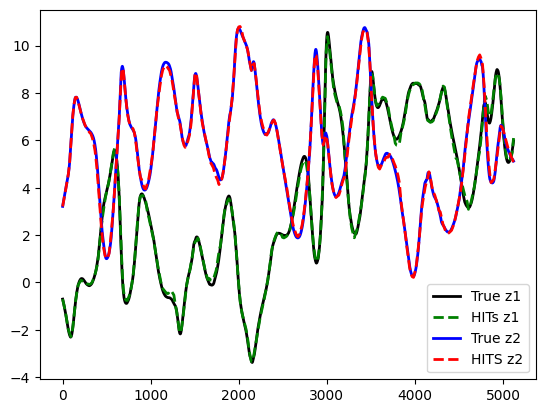

In [22]:
plt.plot(encoded[0,1:,0],'k',lw=2)
plt.plot(z_hits[0,:,0],'g--',lw=2)
plt.plot(encoded[0,1:,1],'b',lw=2)
plt.plot(z_hits[0,:,1],'r--',lw=2)
L=['True z1','HITs z1','True z2','HITS z2']
plt.legend(L)
plt.show()

In [23]:
# plt.semilogy(PCA_loss.T,'k*-')
# plt.semilogy(AE_loss.T,'b*-')
# plt.show()

In [24]:
# test_data=FHNresults_10T['test_data'].cpu().detach().numpy()
# test_data.shape

In [25]:
### loading variables
# test_data=FHNresults_10T['test_data'].cpu().detach().numpy()
# encoded=FHNresults_10T['encoded'].cpu().detach().numpy()
# z_hits=FHNresults_10T['z_hits'].cpu().detach().numpy()
# z_lstm=FHNresults_10T['z_lstm'].cpu().detach().numpy()
# z_RC=FHNresults_10T['z_RC']
# z_sindy=FHNresults_10T['z_sindy']
# AEpred=FHNresults_10T['AEpred']
# y_hits=FHNresults_10T['y_hits'].cpu().detach().numpy()
# y_lstm=FHNresults_10T['y_lstm'].cpu().detach().numpy()
# y_RC=FHNresults_10T['y_RC'].cpu().detach().numpy()
# y_sindy=FHNresults_10T['y_sindy'].cpu().detach().numpy()

In [26]:
z_hits.shape,encoded.shape

((5, 5120, 8), (5, 5121, 8))

In [29]:
latent_hits.shape

torch.Size([5, 5120, 8])

In [30]:
# latent_hits.shape
# latent=torch.unsqueeze(latent_hits, 0)
# latent.shape

In [31]:
time=torch.linspace(1, 51, steps=5120)
# time=torch.unsqueeze(time, 0)
# time.shape

In [32]:
preds_mse[0][0][1:].cpu().detach().numpy().shape

(5119,)

In [33]:
multiscale_err.shape

(5120,)

In [34]:
# plt.plot(t[1:],preds_mse[0][0][1:].cpu().detach().numpy(),'k',lw=2)
# plt.plot(t,multiscale_err,'r--',lw=2)
# plt.show()

In [35]:
### PLOTING THE ERRORS
# plt.semilogy(latent_lstm,'*-',label='lstm')
# plt.semilogy(latent_sindy,'*-',label='SINDY')
# plt.semilogy(latent_RC,'*-',label='RC')
# plt.semilogy(latent_hits,'*-',label='HITS')
# plt.legend(loc=5)
# plt.show()

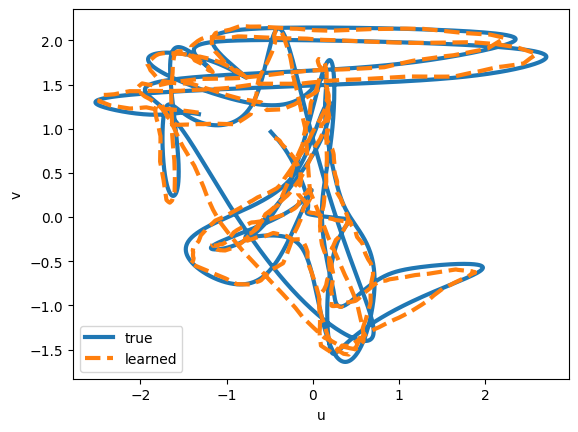

In [36]:
# ## PLOTTING THE OUTPUT
d=50
idx=0
T=1000
y1_true=test_data[idx,1:,0]
y1_aehits=y_hits[idx,:,0]
y2_true=test_data[idx,1:,d]
y2_aehits=y_hits[idx,:,d]
plt.plot(y1_true, y2_true, linewidth=3,label='true')
plt.plot(y1_aehits, y2_aehits, '--',linewidth=3, label='learned')
plt.legend(loc='lower left')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

In [32]:
# train_data = torch.load(data_dir + "/train_data.pt")
# U, S1, Vh = torch.linalg.svd(train_data[0,:,:])

In [33]:
# train_data.shape

In [34]:
# plt.semilogy(S1[1:15].cpu().detach().numpy(),'o',lw=6)
# # plt.semilogy(S2[:16].cpu().detach().numpy(),'+',lw=2)
# plt.semilogy(mse_latent.T,'*',lw=6)
# plt.legend(['PCA','AE'])
# Xt = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
# labels=['2','3','4','5','6','7','8','9','10','11','12','13','14','15']
# plt.xticks(Xt,labels)
# plt.xlabel('Latent dimension')
# plt.ylabel('log (mse)')
# plt.grid()
# plt.show()

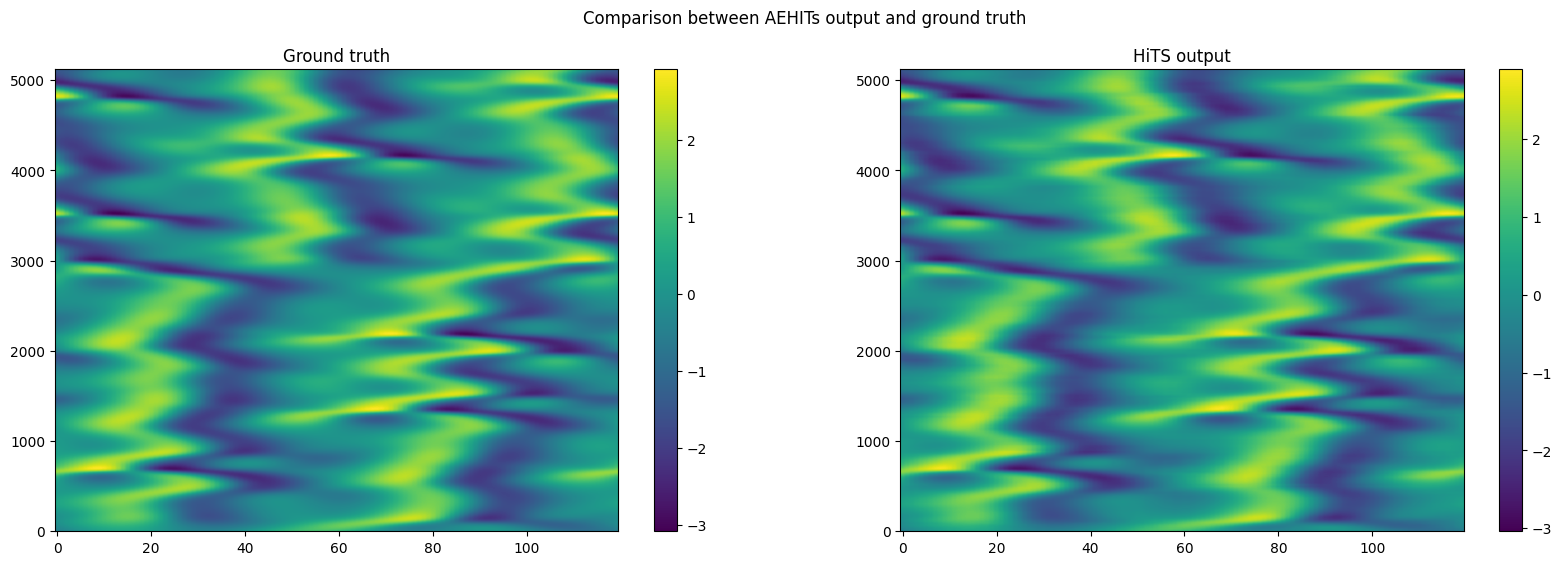

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
# Plot the first subplot
d=101
im1=axs[0].imshow(test_data[0,1:,:d], aspect='auto', origin='lower')
axs[0].set_title('Ground truth')

# Plot the second subplot
im2=axs[1].imshow(y_hits[0,:,:d], aspect='auto', origin='lower')
axs[1].set_title('HiTS output')
# Add a title to the entire figure
fig.suptitle('Comparison between AEHITs output and ground truth')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
# Show the plot
plt.show()

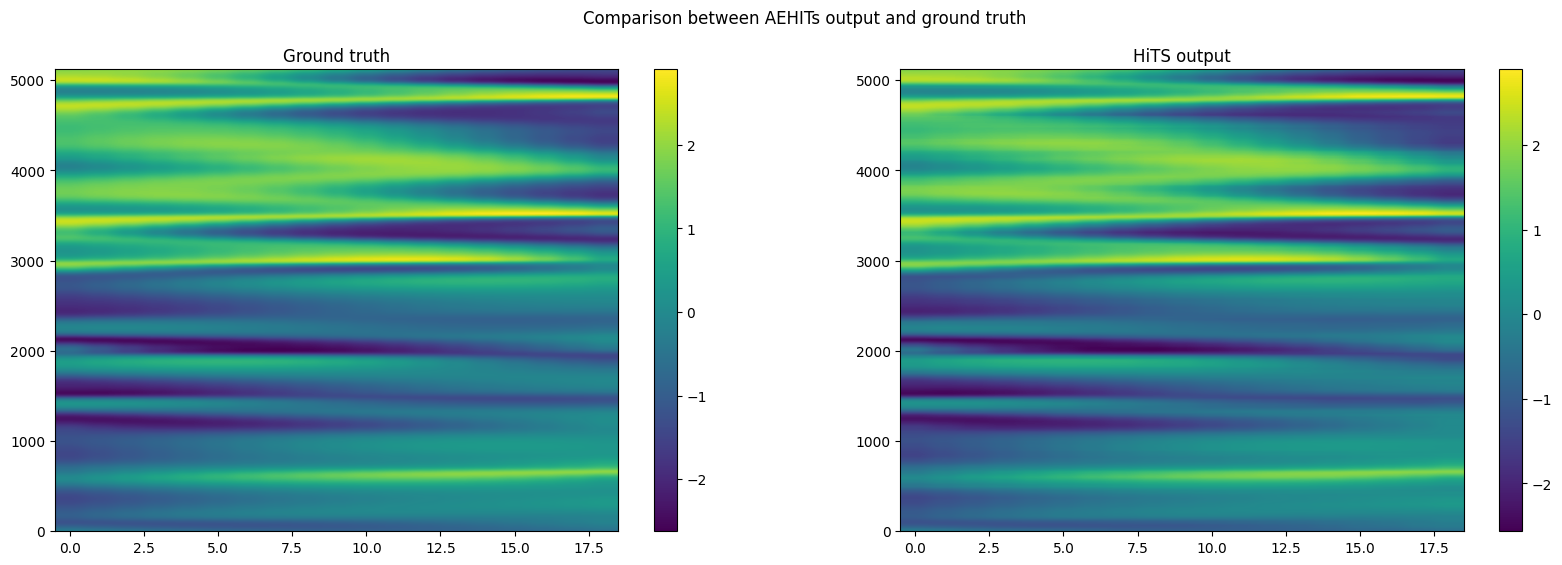

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
# Plot the first subplot
d=101
im1=axs[0].imshow(test_data[0,1:,d:], aspect='auto', origin='lower')
axs[0].set_title('Ground truth')

# Plot the second subplot
im2=axs[1].imshow(y_hits[0,:,d:], aspect='auto', origin='lower')
axs[1].set_title('HiTS output')
# Add a title to the entire figure
fig.suptitle('Comparison between AEHITs output and ground truth')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
# Show the plot
plt.show()

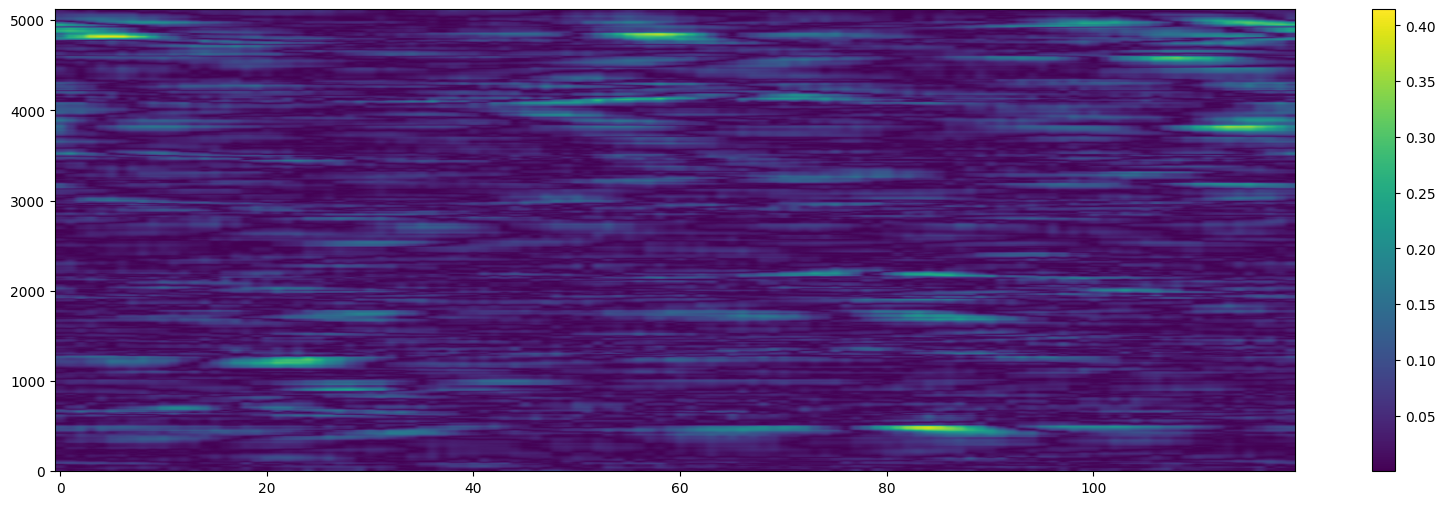

In [40]:
idx=0
fig = plt.figure(figsize=(20, 6))
plt.imshow(np.abs(test_data[idx,1:,:]-y_hits[idx,:,:]), aspect='auto', origin='lower')
cbar = plt.colorbar()
plt.show()

In [81]:
path_fig

'../aehitsResults/KS/figure/'

#### KS Plotting

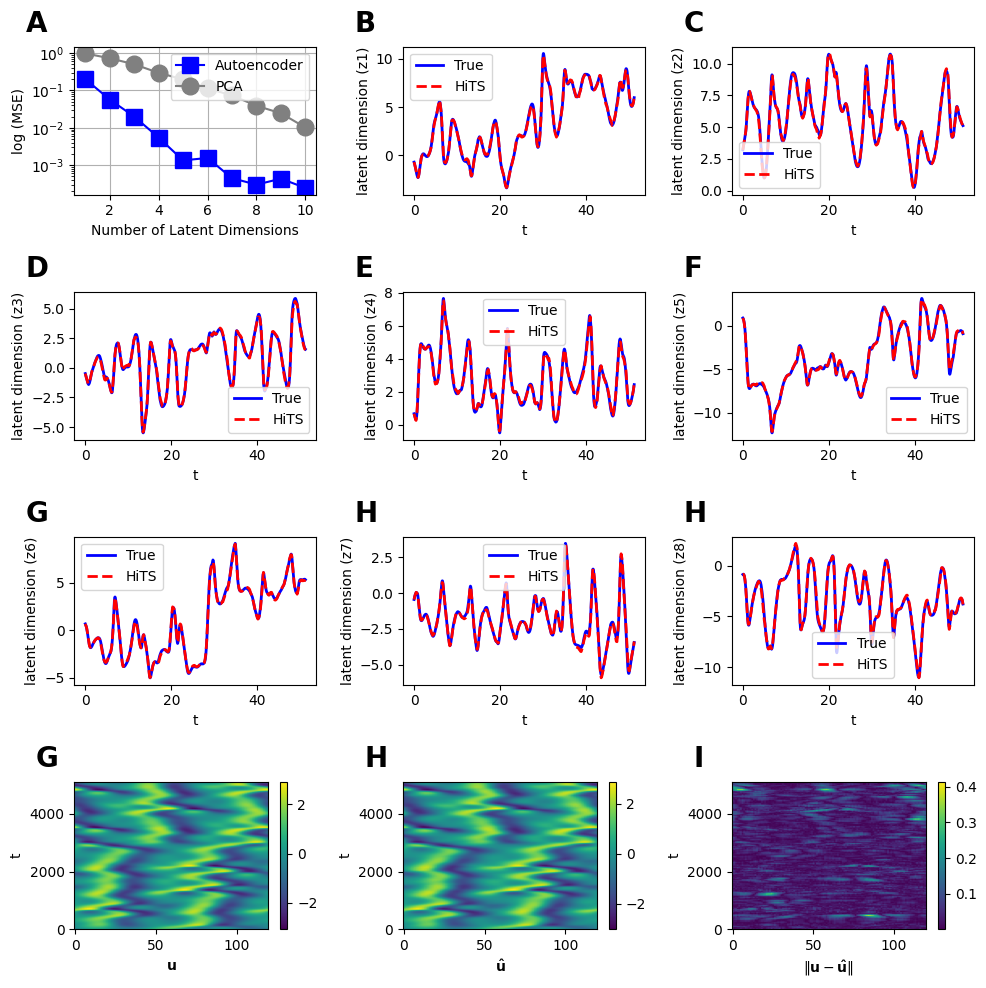

In [85]:
import string
### Figure pre-requisites
### for first plot
latent_dims= np.arange(1,11,1)
### for second plot
d=101
##### for third plot
# test_dataT1=FHNresults['test_data'].cpu().detach().numpy()
# y_hitsT1=FHNresults['y_hits'].cpu().detach().numpy()
# labels = 'ABCDEFGHI'
# d=101
# idx=0
# st=100

# y1_true=test_dataT1[idx,st+1:,0]
# y1_aehits=y_hitsT1[idx,st:,0]
# y2_true=test_dataT1[idx,st+1:,d]
# y2_aehits=y_hitsT1[idx,st:,d]

u_true=test_data[idx,1:,:]
u_aehits=y_hits[idx,:,:]
# v_true=test_data[idx,1:,d:]
# v_aehits=y_hits[idx,:,d:]
error_u=np.abs(u_true-u_aehits)
# error_v=np.abs(v_true-v_aehits)

#### Figure
fig, axs = plt.subplots(4, 3, figsize=(10, 10))

axs[0, 0].semilogy(latent_dims, AE_loss, marker='s',markersize=12,label='Autoencoder',color='blue')
axs[0, 0].semilogy(latent_dims, PCA_loss, marker='o',markersize=12,label='PCA',color='gray')
# axs[0, 0].set_title('Reconstruction Error vs Latent Dimensions for {} systems'.format(system))
axs[0, 0].set_xlabel('Number of Latent Dimensions')
axs[0, 0].set_ylabel('log (MSE)')
axs[0, 0].grid()
axs[0, 0].legend(loc='upper right')
axs[0, 0].text(-0.2, 1.1, string.ascii_uppercase[0], transform=axs[0, 0].transAxes,
               size=20, weight='bold')


#### second
axs[0, 1].plot(t,encoded[0,1:,0],'b',lw=2)
axs[0, 1].plot(t,z_hits[0,:,0],'r--',lw=2)
L=['True','HiTS']
axs[0, 1].legend(L)
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('latent dimension (z1)')
axs[0, 1].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axs[0, 1].transAxes,
               size=20, weight='bold')
# axs[0, 1].set_position([None, None, 0.1, 0.75]) 
#### third

axs[0, 2].plot(t,encoded[0,1:,1],'b',lw=2)
axs[0, 2].plot(t,z_hits[0,:,1],'r--',lw=2)
L=['True','HiTS']
axs[0, 2].legend(L)
axs[0, 2].set_xlabel('t')
axs[0, 2].set_ylabel('latent dimension (z2)')
axs[0, 2].text(-0.2, 1.1, string.ascii_uppercase[2], transform=axs[0, 2].transAxes,
               size=20, weight='bold')
#### Fourth

axs[1, 0].plot(t,encoded[0,1:,2],'b',lw=2)
axs[1, 0].plot(t,z_hits[0,:,2],'r--',lw=2)
L=['True','HiTS']
axs[1, 0].legend(L)
axs[1, 0].set_xlabel('t')
axs[1,0].set_ylabel('latent dimension (z3)')
axs[1,0].text(-0.2, 1.1, string.ascii_uppercase[3], transform=axs[1, 0].transAxes,
               size=20, weight='bold')
#### Fifth

axs[1, 1].plot(t,encoded[0,1:,3],'b',lw=2)
axs[1, 1].plot(t,z_hits[0,:,3],'r--',lw=2)
L=['True','HiTS']
axs[1,1].legend(L)
axs[1, 1].set_xlabel('t')
axs[1,1].set_ylabel('latent dimension (z4)')
axs[1,1].text(-0.2, 1.1, string.ascii_uppercase[4], transform=axs[1, 1].transAxes,
               size=20, weight='bold')
#### sixth

axs[1, 2].plot(t,encoded[0,1:,4],'b',lw=2)
axs[1, 2].plot(t,z_hits[0,:,4],'r--',lw=2)
L=['True','HiTS']
axs[1,2].legend(L)
axs[1, 2].set_xlabel('t')
axs[1,2].set_ylabel('latent dimension (z5)')
axs[1,2].text(-0.2, 1.1, string.ascii_uppercase[5], transform=axs[1, 2].transAxes,
               size=20, weight='bold')
#### seventh

axs[2, 0].plot(t,encoded[0,1:,5],'b',lw=2)
axs[2, 0].plot(t,z_hits[0,:,5],'r--',lw=2)
L=['True','HiTS']
axs[2,0].legend(L)
axs[2, 0].set_xlabel('t')
axs[2,0].set_ylabel('latent dimension (z6)')
axs[2,0].text(-0.2, 1.1, string.ascii_uppercase[6], transform=axs[2, 0].transAxes,
               size=20, weight='bold')
#### eigth

axs[2, 1].plot(t,encoded[0,1:,6],'b',lw=2)
axs[2, 1].plot(t,z_hits[0,:,6],'r--',lw=2)
L=['True','HiTS']
axs[2,1].legend(L)
axs[2, 1].set_xlabel('t')
axs[2,1].set_ylabel('latent dimension (z7)')
axs[2,1].text(-0.2, 1.1, string.ascii_uppercase[7], transform=axs[2, 1].transAxes,
               size=20, weight='bold')
#### nine

axs[2, 2].plot(t,encoded[0,1:,7],'b',lw=2)
axs[2, 2].plot(t,z_hits[0,:,7],'r--',lw=2)
L=['True','HiTS']
axs[2,2].legend(L)
axs[2, 2].set_xlabel('t')
axs[2,2].set_ylabel('latent dimension (z8)')
axs[2,2].text(-0.2, 1.1, string.ascii_uppercase[7], transform=axs[2, 2].transAxes,
               size=20, weight='bold')
# axs[0, 2].set_position([None,None , 0.1, 0.75]) 



# axs[0, 0].annotate('A', xy=(0.01, 0.085), xycoords='axes fraction', fontsize=16, fontweight='bold')

### second
# Xt2 = np.array([0,1,2,3,4,5,6,7,8,9]) ### FHN
# labels2=['1','2','3','4','5','6','7','8','9','10']
# axs[0, 1].semilogy(latent_lstm,'*-',label='lstm')
# axs[0, 1].semilogy(latent_sindy,'*-',label='SINDY')
# axs[0, 1].semilogy(latent_RC,'*-',label='RC')
# axs[0, 1].semilogy(latent_hits,'*-',label='HITS')
# axs[0, 1].legend(loc=5)
# axs[0, 1].set(xticks=Xt2, xticklabels=labels2)
# axs[0, 1].set_xlabel('Testing sets')
# axs[0, 1].set_ylabel('mse')
# axs[0, 1].set_title('MSE of various testing conditions')
# axs[0, 1].grid()
# axs[0, 1].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axs[0, 1].transAxes,
#                size=20, weight='bold')
# Xt2 = np.array([0,1,2,3,4])
# labels2=['1','2','3','4','5']
# axs[0, 1].semilogy(latent_lstm,'*-',label='lstm')
# axs[0, 1].semilogy(latent_sindy,'*-',label='SINDY')
# axs[0, 1].semilogy(latent_RC,'*-',label='RC')
# axs[0, 1].semilogy(latent_hits,'*-',label='HiTS')
# axs[0, 1].legend(loc=5)
# axs[0, 1].set(xticks=Xt2, xticklabels=labels2)
# axs[0, 1].set_xlabel('Testing sets')
# axs[0, 1].set_ylabel('mse')
# axs[0, 1].set_title('MSE of various testing conditions')
# axs[0, 1].grid()
# axs[0, 1].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axs[0, 1].transAxes,
#                size=20, weight='bold')
# #### third

# axs[0, 2].plot(y1_true[0::10], y2_true[0::10], linewidth=3,label='true')
# axs[0, 2].plot(y1_aehits[0::10], y2_aehits[0::10], '--',linewidth=3, label='learned')
# axs[0, 2].legend(loc='center')
# axs[0, 2].set_ylabel('u')
# axs[0, 2].set_xlabel('v')
# axs[0, 2].set_title('Phase potrait')
# axs[0, 2].grid('v')
# axs[0, 2].text(-0.2, 1.1, string.ascii_uppercase[2], transform=axs[0, 2].transAxes,
#                size=20, weight='bold')




# #### fourth ploting u part in imshow






# ########################
# #### 7 ploting v part in imshow
im4=axs[3, 0].imshow(u_true, aspect='auto', origin='lower')
# axs[2, 0].set_title('v true')
l1 = '$\mathbf{u}$'
axs[3, 0].set_xlabel(l1)
axs[3, 0].set_ylabel('t')
fig.colorbar(im4, ax=axs[3, 0])
axs[3, 0].text(-0.2, 1.1, string.ascii_uppercase[6], transform=axs[3, 0].transAxes,
               size=20, weight='bold')


# #### 8th ploting v from aehits part in imshow
im5=axs[3, 1].imshow(u_aehits, aspect='auto', origin='lower')
# axs[2, 1].set_title('v AEHiTS')
l1 = '$\mathbf{\hat{u}}$'
axs[3, 1].set_xlabel(l1)
axs[3, 1].set_ylabel('t')
fig.colorbar(im5, ax=axs[3, 1])
axs[3, 1].text(-0.2, 1.1, string.ascii_uppercase[7], transform=axs[3, 1].transAxes,
               size=20, weight='bold')


# #### 6th ploting error 
im6=axs[3, 2].imshow(error_u, aspect='auto', origin='lower')
# axs[2, 2].set_title('Error V-true vs V-AEHiTS')
l1 = '$\Vert \mathbf{u}-\mathbf{\hat{u}} \Vert$'
axs[3, 2].set_xlabel(l1)
axs[3, 2].set_ylabel('t')
fig.colorbar(im6, ax=axs[3, 2])
axs[3, 2].text(-0.2, 1.1,string.ascii_uppercase[8], transform=axs[3, 2].transAxes,
               size=20, weight='bold')

# Adjust the spacing between subplots
plt.tight_layout()

figname='MainFigureKS.png'
plt.savefig(path_fig+figname, bbox_inches='tight')
plt.show()

In [83]:
path_fig

'../aehitsResults/KS/figure/'

### FHN plotting

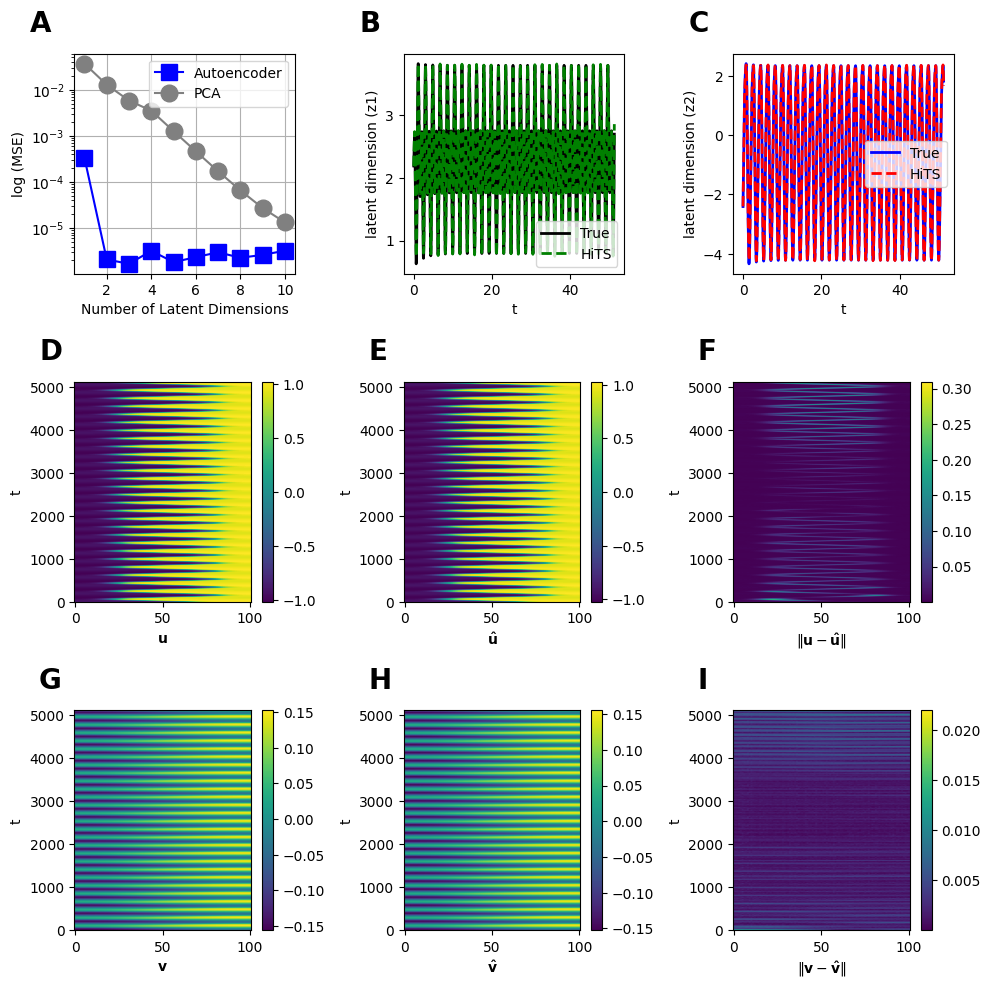

In [56]:
import string
### Figure pre-requisites
### for first plot
latent_dims= np.arange(1,11,1)
### for second plot
d=101
##### for third plot
# test_dataT1=FHNresults['test_data'].cpu().detach().numpy()
# y_hitsT1=FHNresults['y_hits'].cpu().detach().numpy()
# labels = 'ABCDEFGHI'
# d=101
# idx=0
# st=100

# y1_true=test_dataT1[idx,st+1:,0]
# y1_aehits=y_hitsT1[idx,st:,0]
# y2_true=test_dataT1[idx,st+1:,d]
# y2_aehits=y_hitsT1[idx,st:,d]

u_true=test_data[idx,1:,:d]
u_aehits=y_hits[idx,:,:d]
v_true=test_data[idx,1:,d:]
v_aehits=y_hits[idx,:,d:]
error_u=np.abs(u_true-u_aehits)
error_v=np.abs(v_true-v_aehits)

#### Figure
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

axs[0, 0].semilogy(latent_dims, AE_loss, marker='s',markersize=12,label='Autoencoder',color='blue')
axs[0, 0].semilogy(latent_dims, PCA_loss, marker='o',markersize=12,label='PCA',color='gray')
# axs[0, 0].set_title('Reconstruction Error vs Latent Dimensions for {} systems'.format(system))
axs[0, 0].set_xlabel('Number of Latent Dimensions')
axs[0, 0].set_ylabel('log (MSE)')
axs[0, 0].grid()
axs[0, 0].legend()
axs[0, 0].text(-0.2, 1.1, string.ascii_uppercase[0], transform=axs[0, 0].transAxes,
               size=20, weight='bold')


#### second
axs[0, 1].plot(t,encoded[0,1:,0],'k',lw=2)
axs[0, 1].plot(t,z_hits[0,:,0],'g--',lw=2)
L=['True','HiTS']
axs[0, 1].legend(L)
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('latent dimension (z1)')
axs[0, 1].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axs[0, 1].transAxes,
               size=20, weight='bold')

# axs[0, 1].set_position([None, None, 0.1, 0.75]) 
#### third

axs[0, 2].plot(t,encoded[0,1:,1],'b',lw=2)
axs[0, 2].plot(t,z_hits[0,:,1],'r--',lw=2)
L=['True','HiTS']
axs[0, 2].legend(L)
axs[0, 2].set_xlabel('t')
axs[0, 2].set_ylabel('latent dimension (z2)')
axs[0, 2].text(-0.2, 1.1, string.ascii_uppercase[2], transform=axs[0, 2].transAxes,
               size=20, weight='bold')

# axs[0, 2].set_position([None,None , 0.1, 0.75]) 



# axs[0, 0].annotate('A', xy=(0.01, 0.085), xycoords='axes fraction', fontsize=16, fontweight='bold')

### second
# Xt2 = np.array([0,1,2,3,4,5,6,7,8,9]) ### FHN
# labels2=['1','2','3','4','5','6','7','8','9','10']
# axs[0, 1].semilogy(latent_lstm,'*-',label='lstm')
# axs[0, 1].semilogy(latent_sindy,'*-',label='SINDY')
# axs[0, 1].semilogy(latent_RC,'*-',label='RC')
# axs[0, 1].semilogy(latent_hits,'*-',label='HITS')
# axs[0, 1].legend(loc=5)
# axs[0, 1].set(xticks=Xt2, xticklabels=labels2)
# axs[0, 1].set_xlabel('Testing sets')
# axs[0, 1].set_ylabel('mse')
# axs[0, 1].set_title('MSE of various testing conditions')
# axs[0, 1].grid()
# axs[0, 1].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axs[0, 1].transAxes,
#                size=20, weight='bold')
# Xt2 = np.array([0,1,2,3,4])
# labels2=['1','2','3','4','5']
# axs[0, 1].semilogy(latent_lstm,'*-',label='lstm')
# axs[0, 1].semilogy(latent_sindy,'*-',label='SINDY')
# axs[0, 1].semilogy(latent_RC,'*-',label='RC')
# axs[0, 1].semilogy(latent_hits,'*-',label='HiTS')
# axs[0, 1].legend(loc=5)
# axs[0, 1].set(xticks=Xt2, xticklabels=labels2)
# axs[0, 1].set_xlabel('Testing sets')
# axs[0, 1].set_ylabel('mse')
# axs[0, 1].set_title('MSE of various testing conditions')
# axs[0, 1].grid()
# axs[0, 1].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axs[0, 1].transAxes,
#                size=20, weight='bold')
# #### third

# axs[0, 2].plot(y1_true[0::10], y2_true[0::10], linewidth=3,label='true')
# axs[0, 2].plot(y1_aehits[0::10], y2_aehits[0::10], '--',linewidth=3, label='learned')
# axs[0, 2].legend(loc='center')
# axs[0, 2].set_ylabel('u')
# axs[0, 2].set_xlabel('v')
# axs[0, 2].set_title('Phase potrait')
# axs[0, 2].grid('v')
# axs[0, 2].text(-0.2, 1.1, string.ascii_uppercase[2], transform=axs[0, 2].transAxes,
#                size=20, weight='bold')




# #### fourth ploting u part in imshow
im1=axs[1, 0].imshow(u_true, aspect='auto', origin='lower')
# axs[1, 0].set_title('u true')
fig.colorbar(im1, ax=axs[1, 0])
l1 = '$\mathbf{u}$'
axs[1, 0].set_xlabel(l1)
axs[1, 0].set_ylabel('t')
axs[1, 0].text(-0.2, 1.1, string.ascii_uppercase[3], transform=axs[1, 0].transAxes,
               size=20, weight='bold')


# #### 5th ploting u from aehits part in imshow
im2=axs[1, 1].imshow(u_aehits, aspect='auto', origin='lower')
# axs[1, 1].set_title('u AEHiTS')
l1 = '$\mathbf{\hat{u}}$'
axs[1, 1].set_xlabel(l1)
axs[1, 1].set_ylabel('t')
fig.colorbar(im2, ax=axs[1, 1])
axs[1, 1].text(-0.2, 1.1, string.ascii_uppercase[4], transform=axs[1, 1].transAxes,
               size=20, weight='bold')


# #### 6th ploting error 
im3=axs[1, 2].imshow(error_u, aspect='auto', origin='lower')
l1 = '$\Vert \mathbf{u}-\mathbf{\hat{u}} \Vert$'
axs[1, 2].set_xlabel(l1)
axs[1, 2].set_ylabel('t')
# axs[1, 2].set_title('Error U-true vs U-AEHiTS')
fig.colorbar(im3, ax=axs[1, 2])
axs[1, 2].text(-0.2, 1.1, string.ascii_uppercase[5], transform=axs[1, 2].transAxes,
               size=20, weight='bold')

# ########################
# #### 7 ploting v part in imshow
im4=axs[2, 0].imshow(v_true, aspect='auto', origin='lower')
# axs[2, 0].set_title('v true')
l1 = '$\mathbf{v}$'
axs[2, 0].set_xlabel(l1)
axs[2, 0].set_ylabel('t')
fig.colorbar(im4, ax=axs[2, 0])
axs[2, 0].text(-0.2, 1.1, string.ascii_uppercase[6], transform=axs[2, 0].transAxes,
               size=20, weight='bold')


# #### 8th ploting v from aehits part in imshow
im5=axs[2, 1].imshow(v_aehits, aspect='auto', origin='lower')
# axs[2, 1].set_title('v AEHiTS')
l1 = '$\mathbf{\hat{v}}$'
axs[2, 1].set_xlabel(l1)
axs[2, 1].set_ylabel('t')
fig.colorbar(im5, ax=axs[2, 1])
axs[2, 1].text(-0.2, 1.1, string.ascii_uppercase[7], transform=axs[2, 1].transAxes,
               size=20, weight='bold')


# #### 6th ploting error 
im6=axs[2, 2].imshow(error_v, aspect='auto', origin='lower')
# axs[2, 2].set_title('Error V-true vs V-AEHiTS')
l1 = '$\Vert \mathbf{v}-\mathbf{\hat{v}} \Vert$'
axs[2, 2].set_xlabel(l1)
axs[2, 2].set_ylabel('t')
fig.colorbar(im6, ax=axs[2, 2])
axs[2, 2].text(-0.2, 1.1,string.ascii_uppercase[8], transform=axs[2, 2].transAxes,
               size=20, weight='bold')

# Adjust the spacing between subplots
plt.tight_layout()

figname='MainFigureFHN.png'
plt.savefig(path_fig+figname, bbox_inches='tight')
plt.show()


In [54]:
path_fig

'../aehitsResults/FHN/figure/'

In [47]:
# import matplotlib.pyplot as plt

# # Create a figure and 10 subplots
# fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# # Data for each subplot (you can replace these with your own data)
# data = [ [1, 2, 3, 4, 5],
#          [5, 4, 3, 2, 1],
#          [2, 4, 6, 8, 10],
#          [10, 8, 6, 4, 2],
#          [3, 6, 9, 12, 15],
#          [15, 12, 9, 6, 3],
#          [4, 8, 12, 16, 20],
#          [20, 16, 12, 8, 4],
#          [5, 10, 15, 20, 25],
#          [25, 20, 15, 10, 5] ]

# # Labels to assign to each subplot
# labels = 'ABCDEFGHIJ'

# # Plot each subplot and add the corresponding label
# for i, ax in enumerate(axes.flat):
#     ax.plot(data[i])
#     ax.set_xlabel('X-axis')
#     ax.set_ylabel('Y-axis')

# # Adjust layout and spacing between subplots
# plt.tight_layout()

# # Add annotations outside the figure
# for i, label in enumerate(labels):
#     x_pos = 0.055 + (i % 5) * 0.19
#     y_pos = 0.95 if i < 5 else 0.46
#     fig.text(x_pos, y_pos, label, fontsize=16, fontweight='bold')

# # Show the plots
# plt.show()


In [ ]:
# # Create a figure and subplots
# fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# # Adjust the spacing between subplots
# fig.subplots_adjust(hspace=0.3, wspace=0.3)

# # Generate sample data for plotting
# x = np.linspace(0, 2*np.pi, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y3 = np.tan(x)

# # Define the variables and labels for each subplot
# variables = [
#     [(mse_latent.T, 'AE'), (S1, 'PCA')],
#     [(y2, 'cos(x)'), (y3, 'tan(x)')],
#     [(y1, 'sin(x)'), (y3, 'tan(x)')]
# ]  # Replace with your actual variables and labels

# for i in range(3):
#     for j in range(3):
#         # Access the subplot using its index
#         ax = axs[i, j]

#         # Plot the variables in the subplot
#         for var, label in variables[i*3+j]:
#             ax.plot(var, label=label)

#         # Customize the subplot
#         ax.set_title(f'Subplot {i*3+j+1}')
#         ax.legend()

# # Display the figure
# plt.show()